In [ ]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib

In [ ]:
#Make the confusion matrix prettier

def pretty_confusion_matrix(y_test, y_pred):

  figsize = (15, 15)

  #Create the confusion matrix
  cm = confusion_matrix(y_test, tf.math.round(y_pred))
  cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  #Lets now pretify it
  fig, ax = plt.subplots(figsize = figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #Create classes
  classes = class_names

  if classes : 
    labels = classes
  else : 
    labels = np.arange(cm.shape[0])

  #Label the axes
  ax.set(title = "Confusion Matrix", 
        xlabel = "Predicted Lable",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  #Set x-axis lables to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  #Adjust label sizes
  ax.yaxis.label.set_size(15)
  ax.xaxis.label.set_size(15)
  ax.title.set_size(15)

  #Set the threshold for differen colors
  threshold = (cm.max() + cm.min())/2

  #Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment='center',
            color='white' if cm[i, j] > threshold else 'black',
            size = 10)

Now lets code our first CNN

In [ ]:
#Lets import the data
import zipfile

#this downloads the file to google colab
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Lets unzip the file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-11-01 20:22:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.132.128, 74.125.201.128, 74.125.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.132.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   148MB/s    in 0.7s    

2021-11-01 20:22:18 (148 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



Noe lets inspect the images

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

Very useful visualization code below

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print (f'There are {len(dirnames)} directories and {len(filenames)} images in "/{dirpath}".') 

There are 2 directories and 1 images in "/pizza_steak".
There are 2 directories and 1 images in "/pizza_steak/test".
There are 0 directories and 250 images in "/pizza_steak/test/steak".
There are 0 directories and 250 images in "/pizza_steak/test/pizza".
There are 2 directories and 1 images in "/pizza_steak/train".
There are 0 directories and 750 images in "/pizza_steak/train/steak".
There are 0 directories and 750 images in "/pizza_steak/train/pizza".


In [ ]:
#Another way to find out the number of samples
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train 

750

In [ ]:
#Get the class names programatically

data_dir = pathlib.Path('pizza_steak/train')#Create a list of classnames from the sub-directory
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names = class_names[1:] #remove classnames
print (class_names)

['pizza' 'steak']


In [ ]:
#Lets visualise our images
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #set up the target directory
  target_folder = target_dir + target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print (random_image)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print (f'Image shape : {img.shape}')

  return img

['38349.jpg']
Image shape : (384, 512, 3)


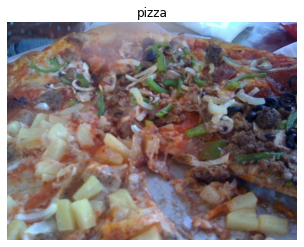

In [ ]:
img = view_random_image(target_dir='pizza_steak/train/', target_class='pizza')

In [ ]:
#What if you dont plot the img returned, is it a numpy array? Yes, it is
img

array([[[ 15,  33,  45],
        [ 19,  35,  50],
        [ 24,  32,  51],
        ...,
        [119, 145, 206],
        [118, 148, 212],
        [119, 150, 215]],

       [[ 16,  34,  46],
        [ 22,  35,  51],
        [ 24,  32,  51],
        ...,
        [130, 140, 199],
        [125, 139, 200],
        [124, 140, 202]],

       [[ 19,  35,  48],
        [ 27,  40,  56],
        [ 29,  37,  56],
        ...,
        [102,  88, 141],
        [ 99,  86, 140],
        [ 97,  86, 142]],

       ...,

       [[166, 181, 160],
        [165, 180, 159],
        [162, 180, 158],
        ...,
        [ 91, 115, 143],
        [ 92, 115, 146],
        [ 95, 118, 149]],

       [[164, 179, 158],
        [162, 180, 158],
        [161, 179, 157],
        ...,
        [ 92, 116, 144],
        [ 92, 115, 146],
        [ 95, 118, 149]],

       [[150, 168, 146],
        [152, 170, 148],
        [156, 174, 152],
        ...,
        [ 89, 115, 142],
        [ 90, 115, 145],
        [ 92, 117, 147]]

In [ ]:
#Now get all the pixel values normalized(between 0 and 1)
img/255.

array([[[0.05882353, 0.12941176, 0.17647059],
        [0.0745098 , 0.1372549 , 0.19607843],
        [0.09411765, 0.1254902 , 0.2       ],
        ...,
        [0.46666667, 0.56862745, 0.80784314],
        [0.4627451 , 0.58039216, 0.83137255],
        [0.46666667, 0.58823529, 0.84313725]],

       [[0.0627451 , 0.13333333, 0.18039216],
        [0.08627451, 0.1372549 , 0.2       ],
        [0.09411765, 0.1254902 , 0.2       ],
        ...,
        [0.50980392, 0.54901961, 0.78039216],
        [0.49019608, 0.54509804, 0.78431373],
        [0.48627451, 0.54901961, 0.79215686]],

       [[0.0745098 , 0.1372549 , 0.18823529],
        [0.10588235, 0.15686275, 0.21960784],
        [0.11372549, 0.14509804, 0.21960784],
        ...,
        [0.4       , 0.34509804, 0.55294118],
        [0.38823529, 0.3372549 , 0.54901961],
        [0.38039216, 0.3372549 , 0.55686275]],

       ...,

       [[0.65098039, 0.70980392, 0.62745098],
        [0.64705882, 0.70588235, 0.62352941],
        [0.63529412, 0

#Now here is an end to end example

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set random seed
tf.random.set_seed(42)

#Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#set up paths for our data directories
train_dir = '/content/pizza_steak/train'
test_dir = 'pizza_steak/test'

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224,224), class_mode='binary', seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir, batch_size=32, target_size=(224,224), class_mode='binary', seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#Now lets see a sample

images, labels = train_data.next()
images.shape, labels.shape, len(train_data)

((32, 224, 224, 3), (32,), 47)

We make **batch sizes** here because all the images miht not fit into the memory at once

In [ ]:
#Build a CNN now to classify (same as Tiny VGG)

tf.random.set_seed(42)

model1 = tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)),
                                     tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                     tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
                                     tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                     tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                     tf.keras.layers.MaxPool2D(pool_size=2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

history1 = model1.fit(train_data, epochs=15, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/15
47/47 [==============================] - 44s 271ms/step - loss: 0.5827 - accuracy: 0.6667 - val_loss: 0.3926 - val_accuracy: 0.8320
Epoch 2/15
47/47 [==============================] - 12s 248ms/step - loss: 0.4117 - accuracy: 0.8160 - val_loss: 0.3220 - val_accuracy: 0.8720
Epoch 3/15
47/47 [==============================] - 12s 246ms/step - loss: 0.3738 - accuracy: 0.8380 - val_loss: 0.3196 - val_accuracy: 0.8620
Epoch 4/15
47/47 [==============================] - 12s 249ms/step - loss: 0.3388 - accuracy: 0.8600 - val_loss: 0.3723 - val_accuracy: 0.8240
Epoch 5/15
47/47 [==============================] - 12s 248ms/step - loss: 0.3037 - accuracy: 0.8740 - val_loss: 0.3078 - val_accuracy: 0.8680
Epoch 6/15
47/47 [==============================] - 12s 245ms/step - loss: 0.2644 - accuracy: 0.8900 - val_loss: 0.3479 - val_accuracy: 0.8480
Epoch 7/15
47/47 [==============================] - 12s 245ms/step - loss: 0.2265 - accuracy: 0.9140 - val_loss: 0.3778 - val_accuracy: 0.8320

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
model1.evaluate(valid_data)

16/16 [==============================] - 3s 170ms/step - loss: 0.6280 - accuracy: 0.8400


[0.6279745697975159, 0.8399999737739563]

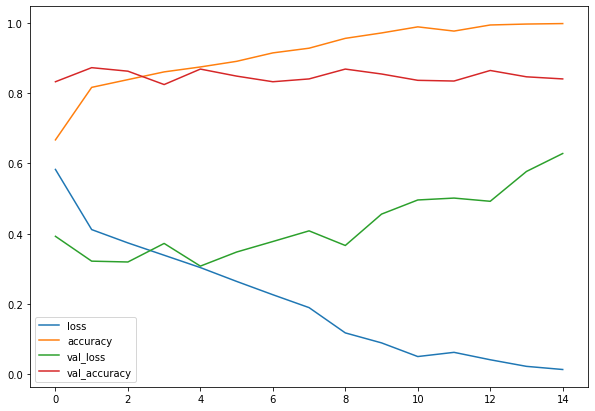

In [ ]:
#lets plot the loss curves now
import pandas as pd
pd.DataFrame(history1.history).plot(figsize=(10,7))

Hence the above model is sort of over-fitting. lets solve that with another model.

In [ ]:
#Now lets build a better network
tf.random.set_seed(42)

model_new = tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)),
                                     tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
                                     tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                     tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
                                     tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                     tf.keras.layers.MaxPool2D(pool_size=2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1, activation='sigmoid')
])

model_new.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

history_new = model_new.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 238ms/step - loss: 0.5834 - accuracy: 0.7027 - val_loss: 0.4711 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 11s 232ms/step - loss: 0.4549 - accuracy: 0.7867 - val_loss: 0.4109 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 11s 229ms/step - loss: 0.4203 - accuracy: 0.8147 - val_loss: 0.3436 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 11s 231ms/step - loss: 0.3874 - accuracy: 0.8240 - val_loss: 0.3131 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 11s 230ms/step - loss: 0.3753 - accuracy: 0.8420 - val_loss: 0.3307 - val_accuracy: 0.8540


In [ ]:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6760)             

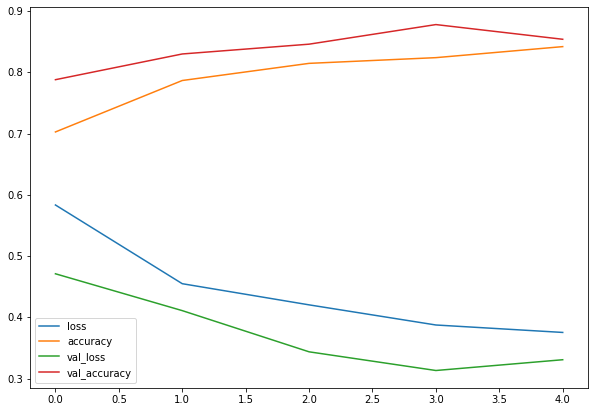

In [ ]:
#lets plot the loss curves now
import pandas as pd
pd.DataFrame(history_new.history).plot(figsize=(10,7))

In [ ]:
#Now lets use data augmentation and make our model better with data augmentation

#set random seed
tf.random.set_seed(42)

#Preprocess data
train_datagen_augmented = ImageDataGenerator(rescale=1./255, 
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#Now lets visualise data augmentation by importing it (augmentation is only performed on training data)

#set up paths for our data directories
train_dir = '/content/pizza_steak/train'
test_dir = 'pizza_steak/test'

#Import data from directories and turn it into batches
print ("Augmented Train data")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224,224), class_mode='binary', shuffle=True, seed=42)
print ("Non-Augmented Train data")
train_data = train_datagen.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224,224), class_mode='binary', shuffle=True, seed=42)
print ("Non-Augmented Test data")
valid_data = valid_datagen.flow_from_directory(directory=test_dir, batch_size=32, target_size=(224,224), class_mode='binary', seed=42)

Augmented Train data
Found 1500 images belonging to 2 classes.
Non-Augmented Train data
Found 1500 images belonging to 2 classes.
Non-Augmented Test data
Found 500 images belonging to 2 classes.


Finaly lets visualise some augmented data

(-0.5, 223.5, 223.5, -0.5)

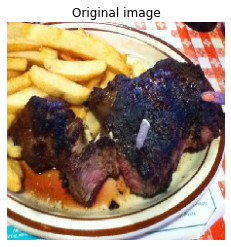

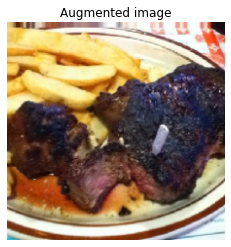

In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

#Show the original images and the augmented images
import random
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title('Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')
plt.axis(False)

In [ ]:
#Now lets build a model with augmented training data

tf.random.set_seed(42)

model_augmented = tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)),
                                     tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
                                     tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                     tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
                                     tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                     tf.keras.layers.MaxPool2D(pool_size=2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1, activation='sigmoid')
])

model_augmented.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

history_augmented = model_augmented.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 27s 563ms/step - loss: 0.6593 - accuracy: 0.5920 - val_loss: 0.5545 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 26s 557ms/step - loss: 0.5733 - accuracy: 0.7000 - val_loss: 0.3833 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 26s 555ms/step - loss: 0.5454 - accuracy: 0.7127 - val_loss: 0.4310 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 26s 558ms/step - loss: 0.4880 - accuracy: 0.7680 - val_loss: 0.3523 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 26s 555ms/step - loss: 0.4684 - accuracy: 0.7853 - val_loss: 0.3297 - val_accuracy: 0.8560


Always make sure the training data is shuffled as done above

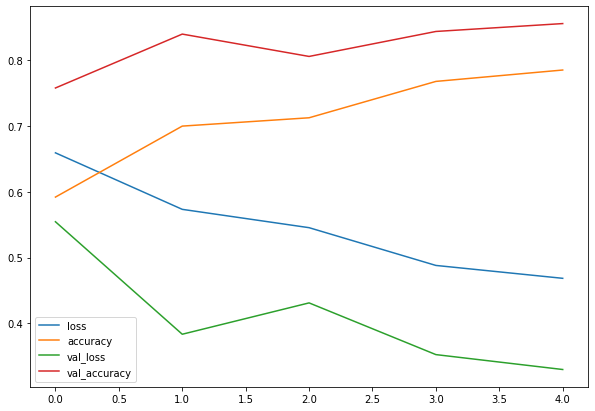

In [ ]:
#Now lets plot the loss curves for augmented data training

pd.DataFrame(history_augmented.history).plot(figsize=(10,7))

Now lets build our final CNN model (the best of all and most complex of all the models)

In [ ]:
tf.random.set_seed(42)

model_best = tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation='relu', input_shape=(224,224,3)),
                                     tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
                                     tf.keras.layers.Conv2D(16, 3, activation='relu'),
                                     tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
                                     tf.keras.layers.Conv2D(16, 3, activation='relu'),
                                     tf.keras.layers.MaxPool2D(pool_size=2),
                                     tf.keras.layers.Conv2D(8, 3, activation='relu'),
                                     tf.keras.layers.MaxPool2D(pool_size=2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1, activation='sigmoid')
])

model_best.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

history_best = model_best.fit(train_data_augmented, epochs=15, steps_per_epoch=len(train_data_augmented), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/15
47/47 [==============================] - 29s 581ms/step - loss: 0.6904 - accuracy: 0.5247 - val_loss: 0.6719 - val_accuracy: 0.5620
Epoch 2/15
47/47 [==============================] - 26s 563ms/step - loss: 0.6510 - accuracy: 0.6273 - val_loss: 0.5628 - val_accuracy: 0.7520
Epoch 3/15
47/47 [==============================] - 27s 574ms/step - loss: 0.5908 - accuracy: 0.6813 - val_loss: 0.5520 - val_accuracy: 0.7340
Epoch 4/15
47/47 [==============================] - 27s 577ms/step - loss: 0.5581 - accuracy: 0.7140 - val_loss: 0.5295 - val_accuracy: 0.7200
Epoch 5/15
47/47 [==============================] - 27s 573ms/step - loss: 0.5501 - accuracy: 0.7280 - val_loss: 0.4096 - val_accuracy: 0.8140
Epoch 6/15
47/47 [==============================] - 27s 572ms/step - loss: 0.5086 - accuracy: 0.7533 - val_loss: 0.3650 - val_accuracy: 0.8380
Epoch 7/15
47/47 [==============================] - 27s 573ms/step - loss: 0.4893 - accuracy: 0.7627 - val_loss: 0.4482 - val_accuracy: 0.8020

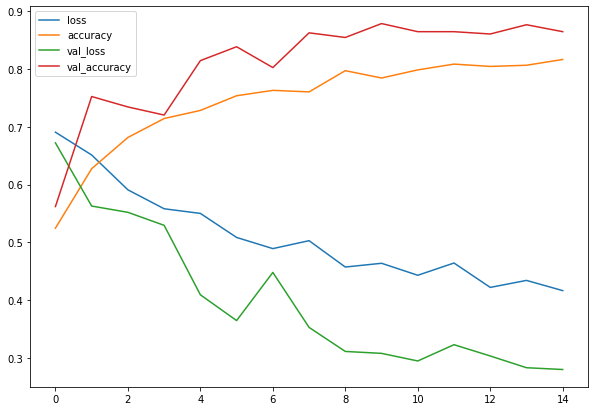

In [ ]:
#Now lets plot the loss curves for augmented data training

pd.DataFrame(history_best.history).plot(figsize=(10,7))

Downloading a custom image to make prediction on

--2021-11-01 20:59:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-11-01 20:59:28 (33.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

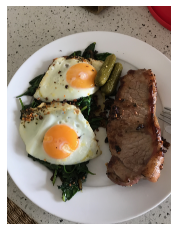

In [ ]:
#View the custom image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
#Check shape and see if its been set to 224*224*3
steak.shape

(4032, 3024, 3)

In [ ]:
#Write a helper function to pre-process the image for us to predict the result of the downloaded image
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [ ]:
#Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak = tf.expand_dims(steak, axis=0)
steak.shape

TensorShape([1, 224, 224, 3])

In [ ]:
#Now make a prediction
model_best.predict(steak)

array([[0.9010009]], dtype=float32)

In [ ]:
#Now write a helper function to decipher this prediction probability which shows up above
def pred_and_plot(model, filename, class_names = class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f"Prediction :  {pred_class}")
  plt.axis(False)

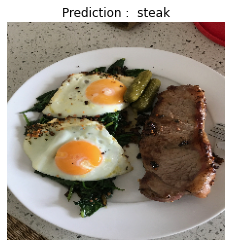

In [ ]:
pred_and_plot(model_best, "03-steak.jpeg")

--2021-11-01 21:29:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2021-11-01 21:29:29 (42.6 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



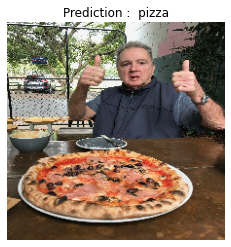

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_best, "03-pizza-dad.jpeg")

###Lets build a non-CNN architecture and see if it works with the image data

In [ ]:
tf.random.set_seed(42)

model2 = tf.keras.models.Sequential([
                                     tf.keras.layers.Flatten(input_shape=(224,224,3)),
                                     tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu),
                                     tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu),
                                     tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid)
])

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history2 = model2.fit(train_data, 
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 220ms/step - loss: 0.7451 - accuracy: 0.4940 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 212ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 212ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 211ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 211ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


['1032846.jpg']
Image shape : (307, 512, 3)
['2587921.jpg']
Image shape : (512, 512, 3)


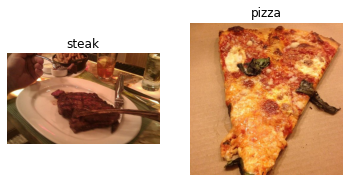

In [ ]:
#Visualize the data again
plt.figure()
plt.subplot(1,2,1)
steak_image = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_image = view_random_image("pizza_steak/train/", "pizza")